## Dale Campbell -- Dssa 5001 -- Assignment 1 -- Part 1

### Goals
1. Import the dataset called `Spotify_Charts.csv`
2. Filter the dataset to only include
    + Artist = "Ed Sheeran"
    + Data after December 31st, 2020
    + Save the result to a new dataframe
3. Determine which Ed Sheeran song experienced the most amount of "MOVE_UP" trends
4. Filter the new Ed Sheeran dataset by sub-setting solely "Shape of you". 
5. Create a histogram of number of daily streams
    + Bin size = 10
    + What are the range of values that occur most frequently? 

In [1]:
# Necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import datetime

1. Import the dataset called "Spotify_Charts.csv"

In [2]:
# Defining filePath as the path to the csv. 
origData = pd.read_csv('../data/Spotify_Charts.csv')

Let's take a look at the data to get an idea of what we're working with

In [3]:
# Looking at the first 10 lines
origData.head(10)

,Unnamed: 0,title,rank,date,artist,url,region,chart,trend,streams
0,55384,Ransom,188,2020-07-03,Lil Tecca,https://open.spotify.com/track/1lOe9qE0vR9zwWQ...,Israel,top200,MOVE_UP,3095.0
1,56010,Bando,95,2020-07-03,ANNA,https://open.spotify.com/track/0kzGjSRHGVcaWxa...,Italy,top200,MOVE_DOWN,83201.0
2,56959,香水,2,2020-07-03,Eito,https://open.spotify.com/track/6y7FocfzyzkGLSH...,Japan,top200,SAME_POSITION,194417.0
3,57069,366日,59,2020-07-03,HY,https://open.spotify.com/track/22aZD7yaGYfhgCY...,Japan,top200,MOVE_UP,36618.0
4,57590,Africa,158,2020-07-03,TOTO,https://open.spotify.com/track/2374M0fQpWi3dLn...,Netherlands,top200,MOVE_DOWN,30075.0
5,57750,P2,45,2020-04-22,Lil Uzi Vert,https://open.spotify.com/track/3kW4z2pIj5VY5fL...,Canada,top200,MOVE_UP,59242.0
6,58068,Rojo,10,2020-04-22,J Balvin,https://open.spotify.com/track/380HmhwTE2NJgaw...,Chile,top200,MOVE_UP,134533.0
7,58225,Diosa,11,2020-04-22,Myke Towers,https://open.spotify.com/track/3JHpk0DOTOzyh07...,Chile,top200,MOVE_DOWN,134116.0
8,58682,Intro,185,2020-04-22,Ninho,https://open.spotify.com/track/61IbolPycynqLBQ...,France,top200,MOVE_DOWN,36610.0
9,59406,Donuts,153,2020-04-22,Gzuz,https://open.spotify.com/track/5XVPNr0CAoUn1jD...,Germany,top200,MOVE_UP,72238.0


In [4]:
# Let's see what datatypes we have
origData.dtypes

Unnamed: 0      int64
title          object
rank            int64
date           object
artist         object
url            object
region         object
chart          object
trend          object
streams       float64
dtype: object

In [5]:
# We'll need to use the data later on so let's clean it up a bit
# Title, artist, url, region, chart, and trend should be Strings
origData['title'] = origData['title'].astype("string")
origData['artist'] = origData['artist'].astype("string")
origData['url'] = origData['url'].astype("string")
origData['region'] = origData['region'].astype("string")
origData['chart'] = origData['chart'].astype("string")
origData['trend'] = origData['trend'].astype("string")

# Date should be in some form of datetime
origData['date'] = pd.to_datetime(origData['date'], format='%Y-%m-%d')

# Now let's verify our new types 
origData.dtypes

Unnamed: 0             int64
title                 string
rank                   int64
date          datetime64[ns]
artist                string
url                   string
region                string
chart                 string
trend                 string
streams              float64
dtype: object

2. Filter the dataset to only include
    + Artist = "Ed Sheeran"
    + Data after December 31st, 2020
    + Save the result to a new dataframe

In [6]:
# Assiging a filterDate to comapre against later
filterDate = "2020-12-31"

# Now we'll filter based on artist = Ed Sheeran & date > December 31 2020
tempDF1 = origData[(origData['artist'].str.lower() == "ed sheeran")]
tempDF2 = origData[(origData['date'] > filterDate)]

# Combining the dataframes into one df
edData = pd.concat([tempDF1, tempDF2], axis=0)
edData.head(10)

,Unnamed: 0,title,rank,date,artist,url,region,chart,trend,streams
224,9733613,I Don't Care (with Justin Bieber),154,2020-01-02,Ed Sheeran,https://open.spotify.com/track/0hVXuCcriWRGvwM...,Argentina,top200,NEW_ENTRY,30195.0
259,9733648,Shape of You,189,2020-01-02,Ed Sheeran,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Argentina,top200,NEW_ENTRY,26986.0
291,9733680,South of the Border (feat. Camila Cabello & Ca...,21,2020-01-02,Ed Sheeran,https://open.spotify.com/track/4vUmTMuQqjdnvlZ...,Australia,top200,MOVE_UP,107836.0
296,9733685,Beautiful People (feat. Khalid),26,2020-01-02,Ed Sheeran,https://open.spotify.com/track/70eFcWOvlMObDhU...,Australia,top200,MOVE_DOWN,97561.0
302,9733691,I Don't Care (with Justin Bieber),32,2020-01-02,Ed Sheeran,https://open.spotify.com/track/0hVXuCcriWRGvwM...,Australia,top200,MOVE_DOWN,87399.0
364,9733753,Shape of You,94,2020-01-02,Ed Sheeran,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Australia,top200,MOVE_DOWN,44982.0
467,9733856,Thinking out Loud,196,2020-01-02,Ed Sheeran,https://open.spotify.com/track/1Slwb6dOYkBlWal...,Australia,top200,MOVE_DOWN,30220.0
471,9733860,Perfect,200,2020-01-02,Ed Sheeran,https://open.spotify.com/track/0tgVpDi06FyKpA1...,Australia,top200,MOVE_DOWN,30074.0
512,9733901,Beautiful People (feat. Khalid),41,2020-01-02,Ed Sheeran,https://open.spotify.com/track/70eFcWOvlMObDhU...,Austria,top200,MOVE_UP,9916.0
517,9733906,I Don't Care (with Justin Bieber),46,2020-01-02,Ed Sheeran,https://open.spotify.com/track/0hVXuCcriWRGvwM...,Austria,top200,MOVE_UP,8860.0


3. Determine which Ed Sheeran song experienced the most amount of "MOVE_UP" trends

In [7]:
# First let's remove rows where trend != move_up
edDataTrendFilter = edData[edData['trend'] == "MOVE_UP"]
edDataTrendFilter.head(5)

,Unnamed: 0,title,rank,date,artist,url,region,chart,trend,streams
291,9733680,South of the Border (feat. Camila Cabello & Ca...,21,2020-01-02,Ed Sheeran,https://open.spotify.com/track/4vUmTMuQqjdnvlZ...,Australia,top200,MOVE_UP,107836.0
512,9733901,Beautiful People (feat. Khalid),41,2020-01-02,Ed Sheeran,https://open.spotify.com/track/70eFcWOvlMObDhU...,Austria,top200,MOVE_UP,9916.0
517,9733906,I Don't Care (with Justin Bieber),46,2020-01-02,Ed Sheeran,https://open.spotify.com/track/0hVXuCcriWRGvwM...,Austria,top200,MOVE_UP,8860.0
539,9733928,South of the Border (feat. Camila Cabello & Ca...,68,2020-01-02,Ed Sheeran,https://open.spotify.com/track/4vUmTMuQqjdnvlZ...,Austria,top200,MOVE_UP,7109.0
697,9734086,Beautiful People (feat. Khalid),26,2020-01-02,Ed Sheeran,https://open.spotify.com/track/70eFcWOvlMObDhU...,Belgium,top200,MOVE_UP,20215.0


In [8]:
# Now let's find which song had the most trends of MOVE_UP
edMoveUp = pd.DataFrame(edDataTrendFilter.groupby([edDataTrendFilter['title']])['trend'].sum())
edMoveUp

,trend
title,
Beautiful People (feat. Khalid),MOVE_UPMOVE_UPMOVE_UPMOVE_UPMOVE_UPMOVE_UPMOVE...
Close Eyes,MOVE_UP
Dior,MOVE_UP
Happier,MOVE_UPMOVE_UPMOVE_UPMOVE_UPMOVE_UPMOVE_UPMOVE...
Hawái,MOVE_UP
I Don't Care (with Justin Bieber),MOVE_UPMOVE_UPMOVE_UPMOVE_UPMOVE_UPMOVE_UPMOVE...
LOCO,MOVE_UP
Not Around,MOVE_UP
Pepas,MOVE_UP


In [9]:
# Okay that didn't give us what we wanted so let's count the number of items each song has. The one with the most MOVE_UP wins
placeholderSize = 0
winner = ""
for index, row in edMoveUp.iterrows():
    tempVar = row['trend'].split("_")
    currentRowSize = len(tempVar)

    if currentRowSize > placeholderSize:
        placeholderSize = currentRowSize
        winner = row.name
        
print("The song with the most number of MOVE_UP trends is:")
print(winner)        

The song with the most number of MOVE_UP trends is:
I Don't Care (with Justin Bieber)


4. Filter the new Ed Sheeran dataset by sub-setting solely "Shape of you". 

In [10]:
# To ensure our subset contains all forms of 'shape of you' let's set the df['title'] to all lowercase
edData['title'] = edData['title'].str.lower()
edData.head(5)

,Unnamed: 0,title,rank,date,artist,url,region,chart,trend,streams
224,9733613,i don't care (with justin bieber),154,2020-01-02,Ed Sheeran,https://open.spotify.com/track/0hVXuCcriWRGvwM...,Argentina,top200,NEW_ENTRY,30195.0
259,9733648,shape of you,189,2020-01-02,Ed Sheeran,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Argentina,top200,NEW_ENTRY,26986.0
291,9733680,south of the border (feat. camila cabello & ca...,21,2020-01-02,Ed Sheeran,https://open.spotify.com/track/4vUmTMuQqjdnvlZ...,Australia,top200,MOVE_UP,107836.0
296,9733685,beautiful people (feat. khalid),26,2020-01-02,Ed Sheeran,https://open.spotify.com/track/70eFcWOvlMObDhU...,Australia,top200,MOVE_DOWN,97561.0
302,9733691,i don't care (with justin bieber),32,2020-01-02,Ed Sheeran,https://open.spotify.com/track/0hVXuCcriWRGvwM...,Australia,top200,MOVE_DOWN,87399.0


In [11]:
# Now let's grab the rows with title = shape of you
edDataShapeOfYou = edData[(edData['title'] == "shape of you")]
edDataShapeOfYou.head(5)

,Unnamed: 0,title,rank,date,artist,url,region,chart,trend,streams
259,9733648,shape of you,189,2020-01-02,Ed Sheeran,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Argentina,top200,NEW_ENTRY,26986.0
364,9733753,shape of you,94,2020-01-02,Ed Sheeran,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Australia,top200,MOVE_DOWN,44982.0
761,9734150,shape of you,90,2020-01-02,Ed Sheeran,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Belgium,top200,MOVE_DOWN,8253.0
991,9734380,shape of you,120,2020-01-02,Ed Sheeran,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Bolivia,top200,MOVE_UP,2045.0
1483,9734872,shape of you,144,2020-01-02,Ed Sheeran,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Canada,top200,MOVE_DOWN,33323.0


5. Create a histogram of number of daily streams
    + Bin size = 10
    + What are the range of values that occur most frequently? 

In [12]:
# Creating a new df for date,streams
groupedData = pd.DataFrame(edDataShapeOfYou.groupby(['date'])['streams'].sum())
groupedData.head()

,streams
date,
2020-01-02,1401229.0
2020-01-03,1403991.0
2020-01-04,1374654.0
2020-01-05,1253207.0
2020-01-06,1418680.0


In [13]:
# This didn't really give me the format I would like, so let's make it 
#   Wanting to create something with [date, streams]
date = []
streams = []

# Loop through groupedData to get date, streams
for index, row in groupedData.iterrows():
    date.append(row.name)
    streams.append(row.streams)
    
# Save the data into a DataFrame    
streamsData = pd.DataFrame()
streamsData['date'] = date
streamsData['streams'] = streams

In [14]:
# Verify it's how we want
streamsData.head(5)

,date,streams
0,2020-01-02,1401229.0
1,2020-01-03,1403991.0
2,2020-01-04,1374654.0
3,2020-01-05,1253207.0
4,2020-01-06,1418680.0


(array([16., 15., 13.,  2., 15.,  2.,  9.,  1., 15.,  1.]),
 array([18263. , 18278.1, 18293.2, 18308.3, 18323.4, 18338.5, 18353.6,
        18368.7, 18383.8, 18398.9, 18414. ]),
 <BarContainer object of 10 artists>)

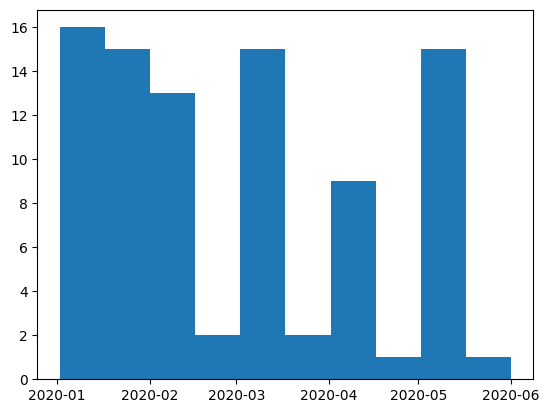

In [15]:
plt.hist(x=streamsData['date'], bins=10)

<AxesSubplot: >

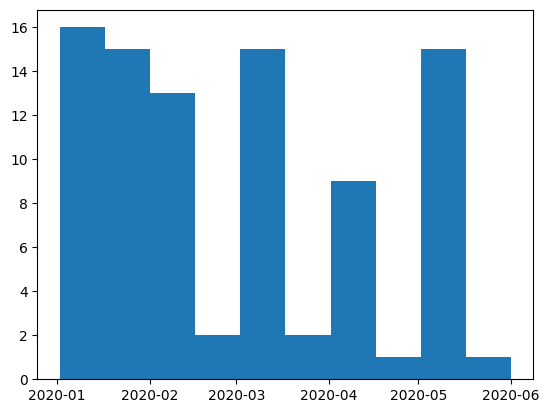

In [16]:
streamsData['date'].hist(bins=10, grid=False, label=True)

From this, we can see the most number of streams happened in the first 3 months of 2020